In [1]:
import datetime
from threading import Thread
import random
import math
from queue  import Queue
import pandas as pd 
import warnings
import time
import trie as trie
import pickle
import matplotlib.pyplot as plt
import copy
import matplotlib.ticker as ticker
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from scipy import spatial
import matplotlib.pyplot as plt

import SatadishaModule_final_trie as phase1

# import phase2_Trie_baseline_reintroduction_effectiveness as phase2
import phase2_Trie_baseline_reintroduction_efficiency as phase2
# import phase2_Trie_just_reintroduction as phase2 #just reintroduction, eviction without experimental result computation
# import phase2_Trie_just_reintroduction_alternate as phase2 # testing reintroduction with various thresholds in unified framework
# import phase2_Trie_reintroduction as phase2
# import phase2_Trie_just_eviction_alternate as phase2 # testing eviction with various thresholds in unified framework

# from sklearn.decomposition import PCA as sklearnPCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy
import scipy.stats as st
import os
import sys

In [2]:
tweets=pd.read_csv("/home/satadisha/Desktop/GitProjects/data/jimJordanKnew.csv",sep =',')

# tweets=pd.read_csv("/home/satadisha/Desktop/GitProjects/data/tweets_1million_for_others.csv",sep =',')
# tweets=tweets[['ID', 'HashTags', 'Tweet IDs', 'Time', 'TweetText', 'User']]

print(len(tweets))
tweets['Time'] =  pd.to_datetime(tweets['Time'])
tweets = tweets.sort_values(by='Time',ascending=True)
# tweets=tweets[tweets.Time.notnull()][50000:]

print(list(tweets.columns.values))

25927
['ID', 'HashTags', 'TweetIDs', 'Time', 'TweetText', 'User']


In [72]:
# print(tweets.head(100))

          ID                           HashTags      TweetIDs  \
738      739                                NaN  1.192870e+18   
233      234                                NaN  1.192868e+18   
8769    8770                          GymJordan  1.192889e+18   
8751    8752                                NaN  1.192889e+18   
8755    8756                                NaN  1.192889e+18   
8705    8706                                NaN  1.192889e+18   
8673    8674                                NaN  1.192889e+18   
8667    8668  JimJordan, JimJordanKnew, RapeBoy  1.192889e+18   
8649    8650                                NaN  1.192889e+18   
8622    8623                                NaN  1.192889e+18   
8618    8619                                NaN  1.192889e+18   
17960  17961                                NaN  1.192920e+18   
8551    8552                                NaN  1.192888e+18   
8530    8531                                NaN  1.192888e+18   
8520    8521             

In [76]:
length=len(tweets)
batch_size=500
print(length,batch_size)
batch_epoch=[]

for g, tweet_batch in tweets.groupby(np.arange(length) //batch_size):
	batch_epoch.append(tweet_batch['Time'].values[-1])
# 	print(tweet_batch['Time'].values[-1])
print(batch_epoch[:10])

print(batch_epoch[1]-batch_epoch[0])
epoch_diff=[(t - s)/np.timedelta64(1, 's') for s, t in zip(batch_epoch[:-1], batch_epoch[1:])]

25927 500
[numpy.datetime64('2019-11-08T12:36:23.000000000'), numpy.datetime64('2019-11-08T12:47:24.000000000'), numpy.datetime64('2019-11-08T13:14:56.000000000'), numpy.datetime64('2019-11-08T13:26:00.000000000'), numpy.datetime64('2019-11-08T13:29:05.000000000'), numpy.datetime64('2019-11-08T13:41:05.000000000'), numpy.datetime64('2019-11-08T13:41:05.000000000'), numpy.datetime64('2019-11-08T13:41:05.000000000'), numpy.datetime64('2019-11-08T13:41:05.000000000'), numpy.datetime64('2019-11-08T13:47:12.000000000')]
661000000000 nanoseconds


In [77]:
print(len(batch_epoch),len(epoch_diff))
print(epoch_diff[0])

52 51
661.0


In [78]:
#inter arrival times
print(epoch_diff)

[661.0, 1652.0, 664.0, 185.0, 720.0, 0.0, 0.0, 0.0, 367.0, 1244.0, 1504.0, 0.0, 109.0, 967.0, 297.0, 551.0, 0.0, 69.0, 0.0, 0.0, 0.0, 0.0, 0.0, 493.0, 232.0, 0.0, 0.0, 330.0, 1160.0, 0.0, 482.0, 0.0, 889.0, 1183.0, 1324.0, 2040.0, 2253.0, 1230.0, 371.0, 1083.0, 1215.0, 460.0, 1758.0, 949.0, 2312.0, 1367.0, 889.0, 2136.0, 1107.0, 3511.0, 3809.0]


In [79]:
# import seaborn as sns
# width=0.01
width=1.0
print(max(epoch_diff),min(epoch_diff))
bins=int((max(epoch_diff)-min(epoch_diff))/width)

# width2=1.0
width2=1.0
bins2=int((max(epoch_diff)-min(epoch_diff))/width2)

# plt.hist(epoch_diff, color = 'blue', edgecolor = 'black', bins = bins)
# # sns.distplot(epoch_diff, hist=True, #kde=True, 
# #              bins=bins, color = 'darkblue', 
# #              hist_kws={'edgecolor':'black'},
# #              kde_kws={'linewidth': 4})

# plt.title('Histogram of Inter-Arrival Time between Tweet Batches')
# plt.xlabel('Inter-Arrival Time in seconds')
# plt.ylabel('Frequency')

# plt.show()

3809.0 0.0


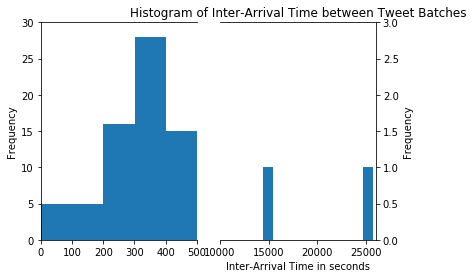

In [46]:
f, (axl, axr) = plt.subplots(1, 2, sharey=False)

# plot the same data on both axes
axl.hist(epoch_diff, bins)
axr.hist(epoch_diff, bins2)

# zoom-in / limit the view to different portions of the data
# axl.set_xlim(0.0, 1.0, 0.1) # outliers only
# axl.set_ylim(0, 70, 10)
axl.set_xlim(0.0, 500.0, 100.0) # outliers only
axl.set_ylim(0, 30, 5.0)

# axr.set_xlim(1.12, 10.0, 1.0)  # most of the data
# axr.set_ylim(0.0, 20.0, 5.0)

axr.set_xlim(10000, 26000, 5000)  # most of the data
axr.set_ylim(0.0, 3.0, 0.5)


# hide the spines between axl and axr
axl.spines['right'].set_visible(False)
axr.spines['left'].set_visible(False)

axl.yaxis.set_ticks_position("left")
axl.yaxis.tick_left()


axr.yaxis.set_ticks_position("right")
axr.yaxis.tick_right()

# axl.set_xlabel('Inter-Arrival Time in seconds')
axl.set_ylabel('Frequency')
axr.set_ylabel('Frequency')
axr.yaxis.set_label_position("right")
# How much space to leave between plots
plt.subplots_adjust(wspace=0.15)
plt.xlabel('Inter-Arrival Time in seconds')
plt.title('Histogram of Inter-Arrival Time between Tweet Batches')


plt.show()

In [36]:
pd.cut(np.array(epoch_diff), bins)

[(0.201, 0.302], (0.302, 0.402], (0.201, 0.302], (-0.00714, 0.101], (0.201, 0.302], ..., (0.101, 0.201], (0.201, 0.302], (0.201, 0.302], (0.302, 0.402], (0.402, 0.503]]
Length: 196
Categories (71, object): [(-0.00714, 0.101] < (0.101, 0.201] < (0.201, 0.302] < (0.302, 0.402] ... (6.734, 6.834] < (6.834, 6.935] < (6.935, 7.0353] < (7.0353, 7.136]]

In [80]:
hist, bins = np.histogram(epoch_diff, bins)
print(hist[:150])
print(hist[150:250])
# print(bins)

[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [81]:
# hist2, bins2 = np.histogram(epoch_diff, bins2)
# print(hist2)
# print(bins2)

In [82]:
# width=100.0
# width=0.01
width=1.0
print(max(epoch_diff),min(epoch_diff))
bins3=int((max(epoch_diff)-min(epoch_diff))/width)

hist3, bins3 = np.histogram(epoch_diff, bins3)
print(hist3)
# print(bins3)
print(hist[:150])
print(hist[150:250])

3809.0 0.0
[14  0  0 ...  0  0  1]
[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [83]:
# cumulative_freq=[sum(hist[:(i+1)]) for i in range(len(hist))]
# print(cumulative_freq)

In [84]:
# cumProb=[elem/cumulative_freq[-1] for elem in cumulative_freq]
# print(cumProb)

In [100]:
dist = st.expon
param = dist.fit(epoch_diff)

#loc, scale=1/lambda
print(param)
st.kstest(epoch_diff, dist.cdf, param)

(0.0, 815.156862745098)


KstestResult(statistic=0.27450980392156865, pvalue=0.0006896950901381937)

In [101]:
dist2 = st.gamma
param2 = dist2.fit(epoch_diff)

#loc, scale=1/lambda
print(param2)
st.kstest(epoch_diff, dist2.cdf, param2[:-2])

(0.7030625441746172, -3.4917301462460852e-25, 781.975220563837)


KstestResult(statistic=0.7254901960784313, pvalue=7.729260256228112e-28)

In [102]:
dist3 = st.beta
param3 = dist3.fit(epoch_diff)

#loc, scale=1/lambda
print(param3)
st.kstest(epoch_diff, dist3.cdf, param3[:-2])

(0.6659717774114625, 8.119465761775832, -1.7927985418919856e-29, 7136.170159919713)


/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


KstestResult(statistic=0.7254901960784313, pvalue=7.729260256228112e-28)

In [103]:
dist4 = st.norm
param4 = dist4.fit(epoch_diff)

#loc, scale=1/lambda
print(param4)
st.kstest(epoch_diff, dist4.cdf, param4[:-2])

(815.156862745098, 883.988562887353)


KstestResult(statistic=0.7254901960784313, pvalue=7.729260256228112e-28)

In [104]:
# dist5 = st.uniform
# param5 = dist5.fit(epoch_diff)

# #loc, scale=1/lambda
# print(param5)
# st.kstest(epoch_diff, dist5.cdf, param5[:-2])

(0.0, 3809.0)


KstestResult(statistic=0.7254901960784313, pvalue=7.729260256228112e-28)

In [87]:
# size = 30000
# x=scipy.arange(start=0.0, stop=8.0, step=0.01)
# x=scipy.arange(start=0.0, stop=26000.0, step=1.0)
x=scipy.arange(start=0.0, stop=3900.0, step=1.0)
pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
print(pdf_fitted)

[36.80273254 36.75761219 36.71254715 ...  0.30878722  0.30840864
  0.30803053]


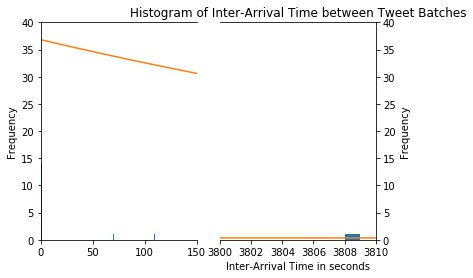

In [107]:
f, (axl, axr) = plt.subplots(1, 2, sharey=False)

# plot the same data on both axes
axl.hist(epoch_diff, bins)
axl.plot(pdf_fitted,label='fitted')

axr.hist(epoch_diff, bins2)
axr.plot(pdf_fitted,label='fitted')
# zoom-in / limit the view to different portions of the data
# axl.set_xlim(0.0, 1.0, 0.1) # outliers only
# axl.set_ylim(0.0, 15.0, 1.0)

axl.set_xlim(0.0, 150.0, 20.0) # outliers only
axl.set_ylim(0, 40, 3.0)

# axr.set_xlim(1.12, 10.0, 1.0)  # most of the data
# axr.set_ylim(0.0, 15.0, 1.0)

axr.set_xlim(3800, 3810, 1.0)  # most of the data
axr.set_ylim(0, 40, 3.0)


# hide the spines between axl and axr
axl.spines['right'].set_visible(False)
axr.spines['left'].set_visible(False)

axl.yaxis.set_ticks_position("left")
axl.yaxis.tick_left()


axr.yaxis.set_ticks_position("right")
axr.yaxis.tick_right()

# axl.set_xlabel('Inter-Arrival Time in seconds')
axl.set_ylabel('Frequency')
axr.set_ylabel('Frequency')
axr.yaxis.set_label_position("right")
# How much space to leave between plots
plt.subplots_adjust(wspace=0.15)
plt.xlabel('Inter-Arrival Time in seconds')
plt.title('Histogram of Inter-Arrival Time between Tweet Batches')


plt.show()

In [109]:
print(st.expon.mean(scale=param[-1]))

815.156862745098
